
---
---

# EDA

---
---

### `NaN` & `non-NaN` in ABV column

In [1]:
import pandas as pd
import numpy as np
import fastparquet as fpq

In [2]:
df= pd.read_parquet("./combined.parquet", engine="fastparquet")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510777 entries, 0 to 4510776
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   beer/name           object        
 1   beer/beerId         object        
 2   beer/brewerId       object        
 3   beer/ABV            float64       
 4   beer/style          object        
 5   review/appearance   float64       
 6   review/aroma        float64       
 7   review/palate       float64       
 8   review/taste        float64       
 9   review/overall      float64       
 10  review/time         datetime64[ns]
 11  review/profileName  object        
 12  review/text         object        
 13  review/site         object        
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 481.8+ MB


In [4]:

#! Percentage of non-null values for each column
(df.count()/len(df)*100).sort_values(ascending=True)

beer/ABV               95.423804
beer/name             100.000000
beer/beerId           100.000000
beer/brewerId         100.000000
beer/style            100.000000
review/appearance     100.000000
review/aroma          100.000000
review/palate         100.000000
review/taste          100.000000
review/overall        100.000000
review/time           100.000000
review/profileName    100.000000
review/text           100.000000
review/site           100.000000
dtype: float64

##### Number of rows where `beer/ABV` is `NaN`

In [5]:

len(df[df['beer/ABV'].isna()])

206422

##### Unique beer names which have `non-NaN` value for `beer/ABV` in atleast one row

In [6]:
abv_not_na = set(df[df['beer/ABV'].notna()]['beer/name'].unique())
len(abv_not_na)

126533

##### Unique beer names which have `NaN` value for `beer/ABV` in atleast one row

In [7]:
abv_na = set(df[df['beer/ABV'].isna()]['beer/name'].unique())
len(abv_na)

36424

##### Unique beer names whose `beer/ABV` values is `NaN` in some rows and `non-NaN` in other.

In [8]:
partially_filled = list(abv_na.intersection(abv_not_na))
len(partially_filled)

2154

In [9]:
df_abv_na = df[df['beer/ABV'].isna()].reset_index(drop=True)
df_abv_na.head()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text,review/site
0,John Harvards Vanilla Black Velvet Stout,31544,8481,NaN,Sweet Stout,5.0,4.0,4.0,3.5,4.00,2004-02-26,egajdzis,"Springfield, PA location... Poured an opaque b...",RateBeer
1,John Harvards American Brown Ale,71714,8481,NaN,Brown Ale,4.0,2.5,3.0,3.0,3.00,2007-04-09,hopdog,"On tap at the Springfield, PA location. Listed...",RateBeer
2,John Harvards Cassis Wit,1470,8481,NaN,Belgian White &#40;Witbier&#41;,3.0,2.5,3.0,3.5,3.50,2000-05-19,PhillyBeer2112,"UPDATED: FEB 19, 2003 Springfield, PA. Interes...",RateBeer
3,Barley Island Dirty &quot;Old&quot; Helen Sour...,114513,3228,NaN,Sour Ale/Wild Ale,4.0,3.5,3.0,3.0,3.25,2010-05-14,fiulijn,"Courtesy of Kim, handbottledCloudy amber color...",RateBeer
4,Barley Island Dirty &quot;Old&quot; Helen Sour...,114513,3228,NaN,Sour Ale/Wild Ale,4.0,3.5,3.0,3.0,3.25,2010-05-03,Ungstrup,Handbottled. A dark amber beer with a white he...,RateBeer


In [10]:
df_abv_not_na = df[~df['beer/ABV'].isna()].reset_index(drop=True)
df_abv_not_na.head()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text,review/site
0,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,4.0,3.0,3.0,3.0,3.25,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured...",RateBeer
1,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,4.0,3.0,4.0,3.5,3.25,2006-09-03,TomDecapolis,On tap at the John Harvards in Springfield PA....,RateBeer
2,John Harvards Cristal Pilsner,71716,8481,5.0,Bohemian Pilsener,4.0,2.5,3.0,3.0,3.50,2000-05-19,PhillyBeer2112,"UPDATED: FEB 19, 2003 Springfield, PA. I've ne...",RateBeer
3,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,2.0,2.0,2.0,2.0,2.00,2006-09-07,TomDecapolis,On tap the Springfield PA location billed as t...,RateBeer
4,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,2.0,2.0,2.0,2.0,2.00,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured...",RateBeer


#### Correlation between rows with `NaN` ABV values

In [11]:
numeric_columns = ["beer/ABV","review/appearance","review/aroma","review/palate","review/taste","review/overall"]
df_abv_na[numeric_columns].corr()

,beer/ABV,review/appearance,review/aroma,review/palate,review/taste,review/overall
beer/ABV,NaN,NaN,NaN,NaN,NaN,NaN
review/appearance,NaN,1.000000,0.532132,0.564266,0.539761,0.548209
review/aroma,NaN,0.532132,1.000000,0.606024,0.782189,0.760749
review/palate,NaN,0.564266,0.606024,1.000000,0.715221,0.716309
review/taste,NaN,0.539761,0.782189,0.715221,1.000000,0.870483
review/overall,NaN,0.548209,0.760749,0.716309,0.870483,1.000000


#### Correlation between rows with `non-NaN` ABV values

In [12]:
df_abv_not_na[numeric_columns].corr()

,beer/ABV,review/appearance,review/aroma,review/palate,review/taste,review/overall
beer/ABV,1.000000,0.285151,0.385511,0.324691,0.357087,0.323087
review/appearance,0.285151,1.000000,0.580552,0.596824,0.581766,0.582303
review/aroma,0.385511,0.580552,1.000000,0.642005,0.794951,0.763911
review/palate,0.324691,0.596824,0.642005,1.000000,0.732812,0.725852
review/taste,0.357087,0.581766,0.794951,0.732812,1.000000,0.863684
review/overall,0.323087,0.582303,0.763911,0.725852,0.863684,1.000000


#### Relative frequency correlation

In [15]:
for col in numeric_columns:
    if col == "beer/ABV":
        continue
    y = df_abv_na[col].value_counts()
    y_ = df_abv_not_na[col].value_counts()
    print(
        "Relative frequency correlation between abv_na and abv_not_na on column |"
        f"{col.center(20)}| {round(y.corr(y_),3)}"
        )

Relative frequency correlation between abv_na and abv_not_na on column | review/appearance  | 0.976
Relative frequency correlation between abv_na and abv_not_na on column |    review/aroma    | 0.941
Relative frequency correlation between abv_na and abv_not_na on column |   review/palate    | 0.968
Relative frequency correlation between abv_na and abv_not_na on column |    review/taste    | 0.944
Relative frequency correlation between abv_na and abv_not_na on column |   review/overall   | 0.951



---
---

### Considering `df_abv_not_na`: DataFrame where `beer/ABV` are all not-NaN values

---
---

In [16]:
df =  df_abv_not_na

In [17]:
print(f"Unique Beer Names: {len(df['beer/name'].unique())}")

Unique Beer Names: 126533


In [18]:
print("25 most common beer name:",end="\n\n")
df['beer/name'].value_counts()[:25]

25 most common beer name:



beer/name
Guinness Draught                   5906
Sierra Nevada Celebration Ale      5586
Samuel Adams Boston Lager          5528
Stone Ruination IPA                5374
Two Hearted Ale                    5073
St. Bernardus Abt 12               4890
Brooklyn Black Chocolate Stout     4751
Ayinger Celebrator Doppelbock      4621
Budweiser                          4613
Stone Imperial Russian Stout       4548
Newcastle Brown Ale                4351
Founders Breakfast Stout           4306
Anchor Steam Beer                  4266
Schneider Aventinus                4245
Samuel Adams Octoberfest           3869
Samuel Adams Winter Lager          3848
Pilsner Urquell                    3767
Corona Extra                       3749
Bud Light                          3747
Sierra Nevada Torpedo Extra IPA    3699
Pabst Blue Ribbon                  3663
Stone Smoked Porter                3516
Anchor Liberty Ale                 3496
Coors Light                        3495
Delirium Tremens              

In [19]:
print(f"Unique Style Names: {len(df['beer/style'].unique())}")

Unique Style Names: 179


In [20]:
print("25 most common beer name: ",end="\n\n")
df['beer/style'].value_counts()[:25]

25 most common beer name: 



beer/style
India Pale Ale &#40;IPA&#41;      175411
Pale Lager                        139076
Belgian Strong Ale                123178
Imperial Stout                    120465
American IPA                      113164
Imperial/Double IPA               104502
American Strong Ale                99948
American Pale Ale                  93960
Barley Wine                        89232
Porter                             86890
American Double / Imperial IPA     85124
Fruit Beer                         75913
Bitter                             71552
Premium Bitter/ESB                 66883
Spice/Herb/Vegetable               65934
Golden Ale/Blond Ale               64727
Amber Ale                          63065
Stout                              61935
Brown Ale                          61571
German Hefeweizen                  59909
American Pale Ale (APA)            58081
Doppelbock                         57424
Belgian Ale                        54465
Russian Imperial Stout             53432
Abbey

In [21]:
print(f"Unique Style Names: {len(df['review/profileName'].unique())}")

Unique Style Names: 59939


In [22]:
print("25 most common reviewers: ",end="\n\n")
df['review/profileName'].value_counts()[:25]

25 most common reviewers: 



review/profileName
fonefan          15981
Ungstrup         14855
Papsoe           13768
yespr            12949
oh6gdx            9892
omhper            9036
joergen           8123
kp                7999
DJMonarch         7980
harrisoni         7553
argo0             7452
hopdog            7444
bu11zeye          7268
Oakes             7192
MiP               7171
jcwattsrugger     6872
fiulijn           6404
ChainGangGuy      6352
anders37          6269
Thorpe429         6192
KimJohansen       6185
imdownthepub      6164
womencantsail     6156
hopscotch         6037
MoritzF           5983
Name: count, dtype: int64

In [23]:
print("Days with most reviews: ",end="\n\n")
df['review/time'].dt.date.value_counts()[:25]

Days with most reviews: 



review/time
2007-09-01    5070
2008-11-20    3219
2011-08-20    2870
2011-02-06    2830
2011-11-05    2748
2008-11-27    2715
2011-02-20    2680
2012-01-08    2668
2011-11-26    2651
2011-02-13    2642
2011-08-07    2627
2011-08-27    2625
2011-12-25    2614
2011-03-27    2603
2011-03-06    2595
2011-09-18    2571
2011-03-19    2567
2011-08-14    2565
2011-04-16    2563
2011-10-09    2561
2011-09-06    2552
2011-02-26    2552
2011-12-31    2551
2011-02-18    2550
2010-02-21    2546
Name: count, dtype: int64

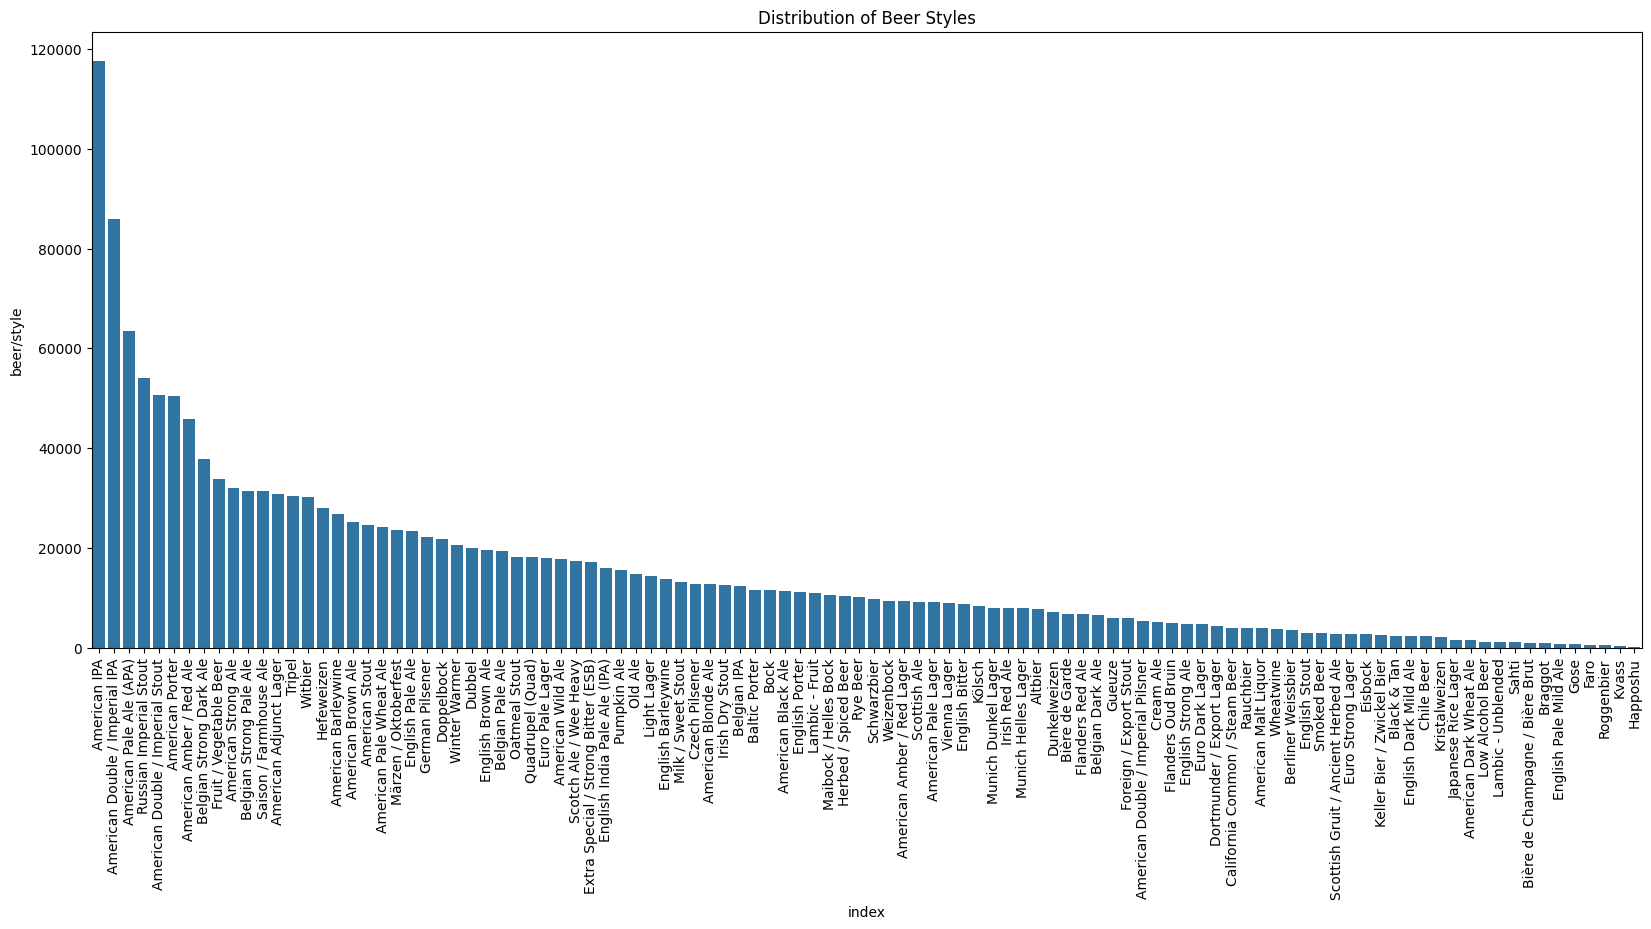

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
style_counts = df['beer/style'].value_counts().reset_index()
plt.figure(figsize=(20, 8))
sns.barplot(x='index', y='beer/style', data=style_counts)
plt.xticks(rotation=90)
plt.title('Distribution of Beer Styles')
plt.show()


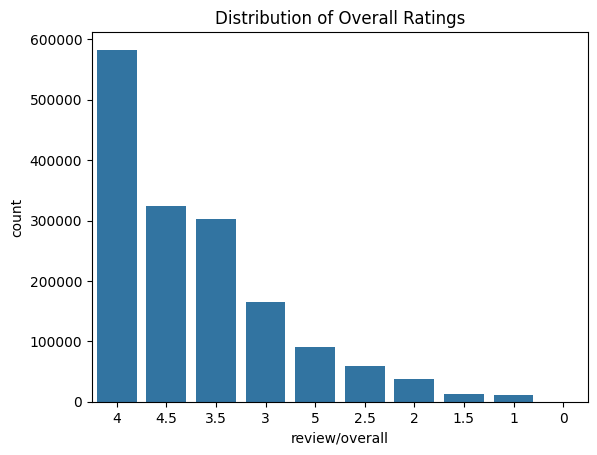

In [ ]:
sns.countplot(x='review/overall', data=df)
plt.title('Distribution of Overall Ratings')
plt.show()

<ipython-input-12-3b9813d7125e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_styles.values, y=top_styles.index, palette='viridis')


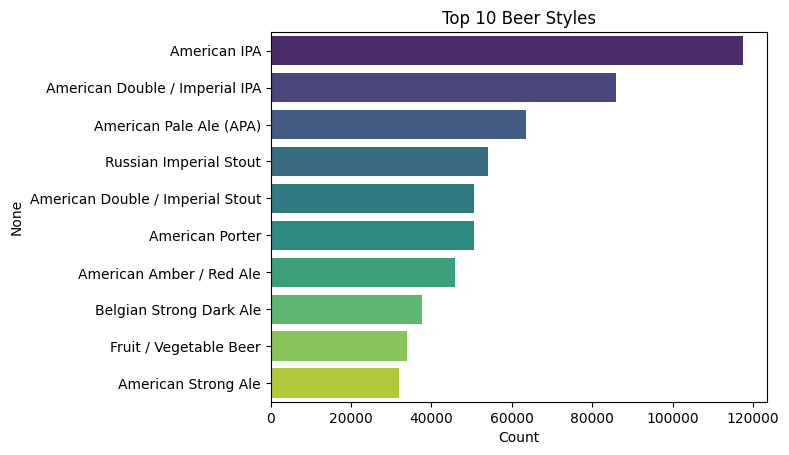

In [ ]:
top_styles = df['beer/style'].value_counts().nlargest(10)
sns.barplot(x=top_styles.values, y=top_styles.index, palette='viridis')
plt.title('Top 10 Beer Styles')
plt.xlabel('Count')
plt.show()

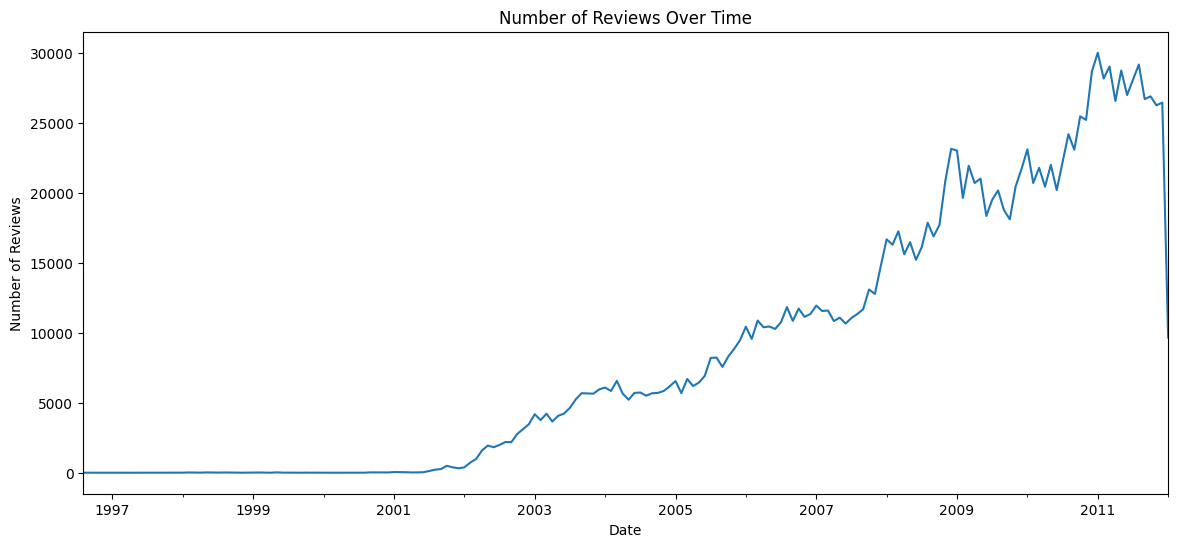

In [ ]:
# Convert 'review/time' to a datetime format
df['review/time'] = pd.to_datetime(df['review/time'], unit='s')

# Plot the number of reviews over time
plt.figure(figsize=(14, 6))
df.set_index('review/time')['beer/name'].resample('M').count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


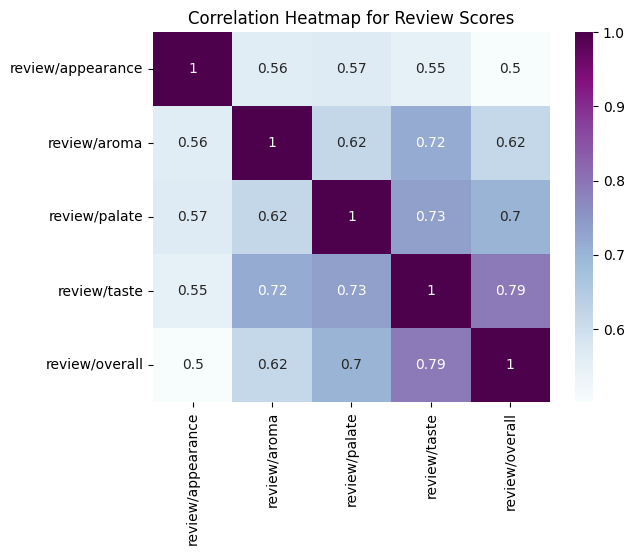

In [ ]:
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap="BuPu")
plt.title("Correlation Heatmap for Review Scores")
plt.show()

<ipython-input-20-a1061196691a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['beer/name'].isin(top_styles)], x='beer/name', y='review/appearance', palette='Set1')


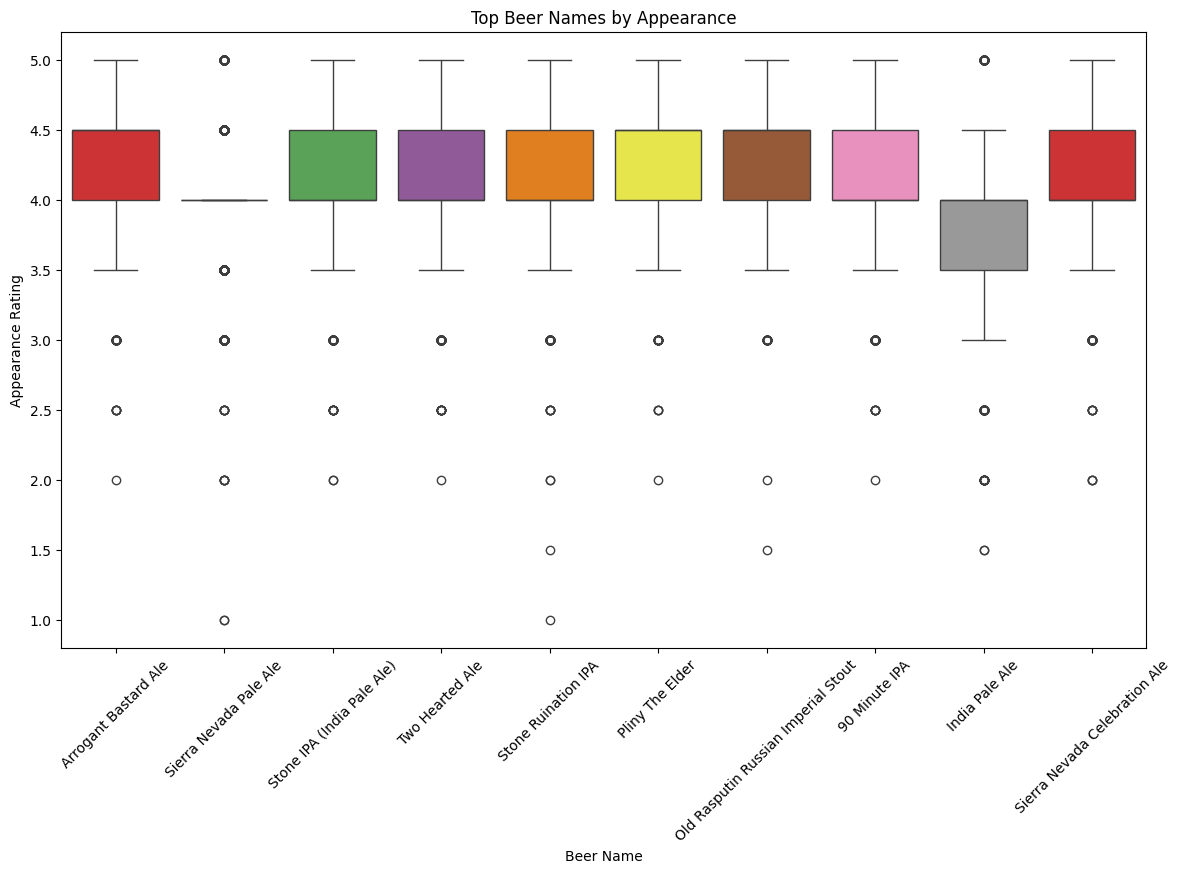

In [ ]:
top_styles = df['beer/name'].value_counts().head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['beer/name'].isin(top_styles)], x='beer/name', y='review/appearance', palette='Set1')
plt.xticks(rotation=45)
plt.title('Top Beer Names by Appearance')
plt.xlabel('Beer Name')
plt.ylabel('Appearance Rating')
plt.show()


<ipython-input-17-50e213ff71f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['beer/style'].isin(top_styles)], x='beer/style', y='review/taste', palette='Set2')


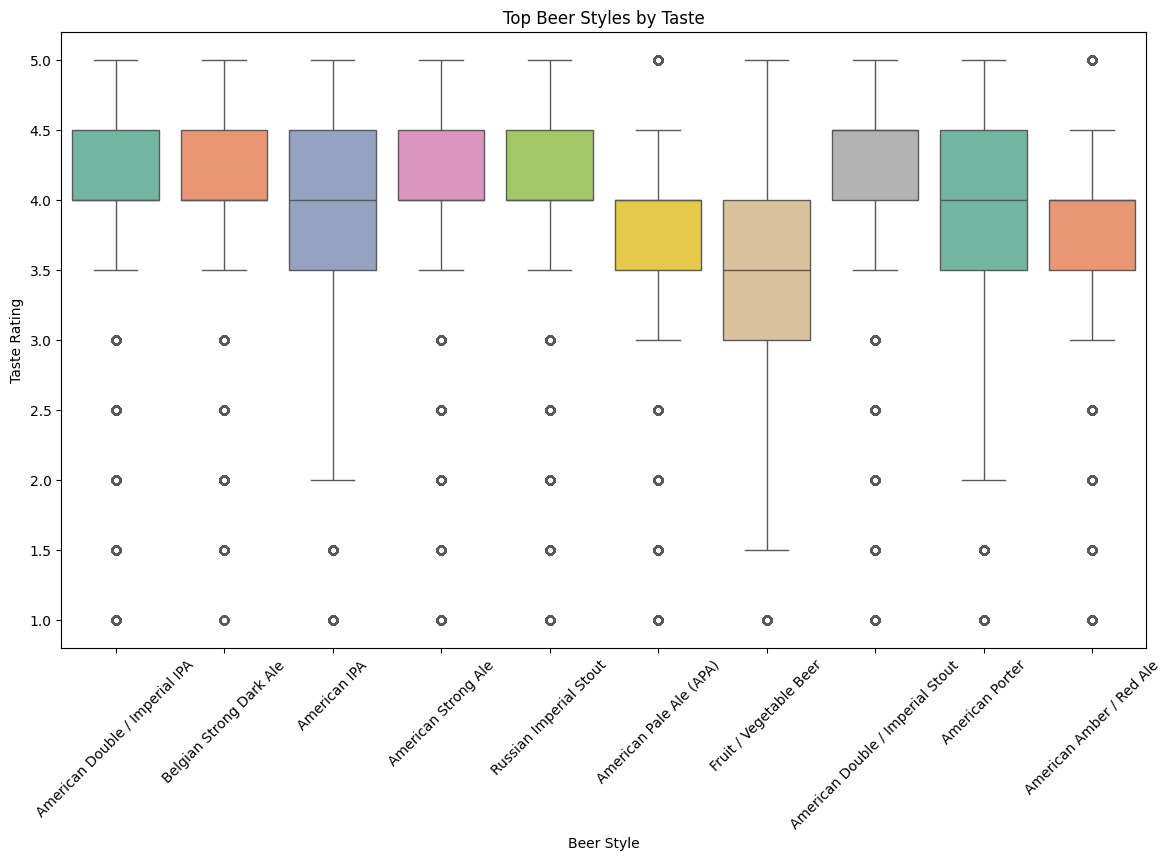

In [ ]:
top_styles = df['beer/style'].value_counts().head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['beer/style'].isin(top_styles)], x='beer/style', y='review/taste', palette='Set2')
plt.xticks(rotation=45)
plt.title('Top Beer Styles by Taste')
plt.xlabel('Beer Style')
plt.ylabel('Taste Rating')
plt.show()


<ipython-input-18-d4419618e71d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['beer/style'].isin(top_styles)], x='beer/style', y='review/aroma', palette='Set2')


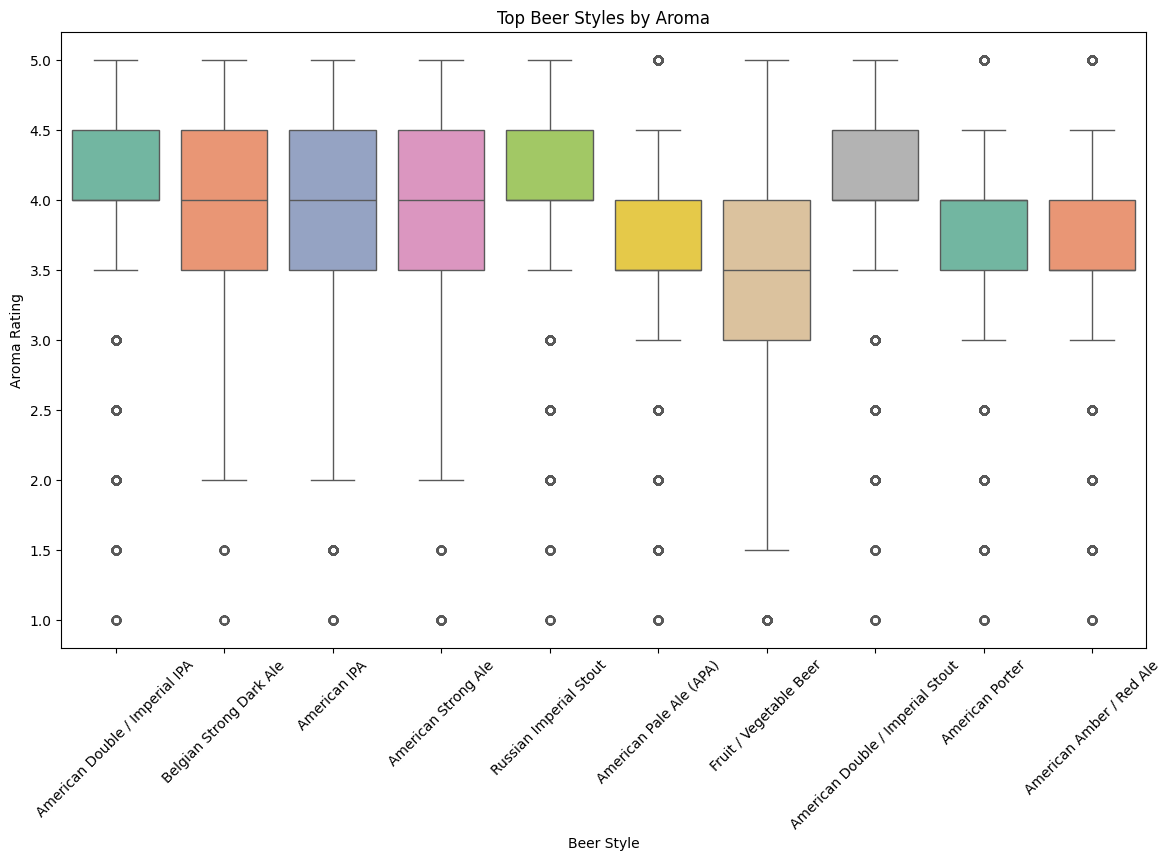

In [ ]:
top_styles = df['beer/style'].value_counts().head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['beer/style'].isin(top_styles)], x='beer/style', y='review/aroma', palette='Set2')
plt.xticks(rotation=45)
plt.title('Top Beer Styles by Aroma')
plt.xlabel('Beer Style')
plt.ylabel('Aroma Rating')
plt.show()


<ipython-input-15-4cbd8dc638ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['beer/style'].isin(top_styles)], x='beer/style', y='review/overall', palette='Set2')


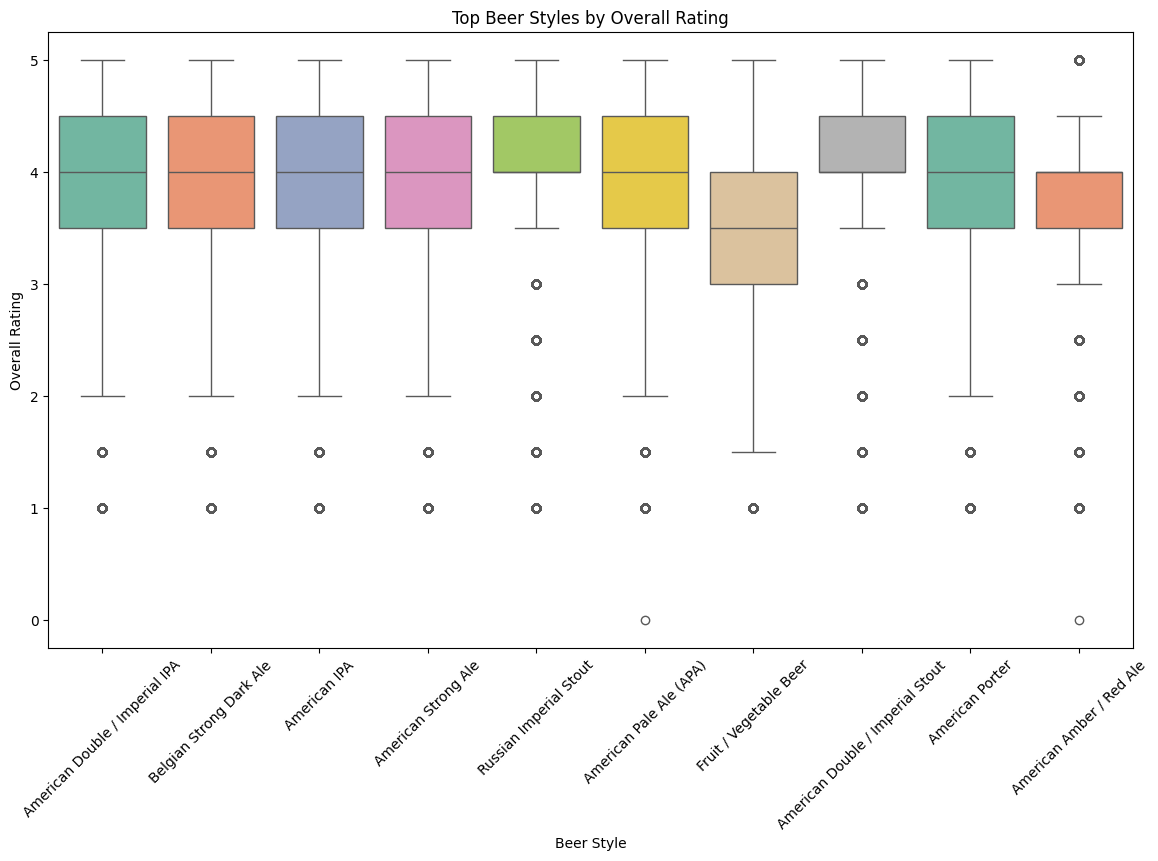

In [ ]:
top_styles = df['beer/style'].value_counts().head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['beer/style'].isin(top_styles)], x='beer/style', y='review/overall', palette='Set2')
plt.xticks(rotation=45)
plt.title('Top Beer Styles by Overall Rating')
plt.xlabel('Beer Style')
plt.ylabel('Overall Rating')
plt.show()
